In [1]:
# 30 k images = https://drive.google.com/file/d/1aXPx6hugWZXCayyBvnomPWA3wVQ4JpqK/view?usp=sharing

# 30 k labels = https://drive.google.com/open?id=1ACVgLfuSRrCRKfWZqMs8CsYLCdIovj-8



from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# for getting into my current dir for PONG
cd /


/


In [3]:
cd /content/drive/My\ Drive/'Colab Notebooks'/PONG

/content/drive/My Drive/Colab Notebooks/PONG


In [4]:
pwd

'/content/drive/My Drive/Colab Notebooks/PONG'

In [5]:
import keras
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import preprocessing
import cv2
import time

Using TensorFlow backend.


In [6]:
ls

actions.csv  AI/  colab_cnn_implementation.ipynb  images/  images.zip


In [0]:
#!wget https://gitlab.com/bkp17/pong_ai/raw/master/cnn_implementation/images.zip

In [0]:
#!sudo apt-get update && apt-get upgrade
#!sudo apt-get install zip

In [0]:
ls

actions.csv  colab_cnn_implementation.ipynb  images.zip


In [0]:
!unzip images.zip

Archive:  images.zip
  inflating: images/frame_28604.jpg  
  inflating: images/frame_20105.jpg  
  inflating: images/frame_22429.jpg  
  inflating: images/frame_10757.jpg  
  inflating: images/frame_26062.jpg  
  inflating: images/frame_23505.jpg  
  inflating: images/frame_7326.jpg   
  inflating: images/frame_4530.jpg   
  inflating: images/frame_4326.jpg   
  inflating: images/frame_18411.jpg  
  inflating: images/frame_6052.jpg   
  inflating: images/frame_14883.jpg  
  inflating: images/frame_29217.jpg  
  inflating: images/frame_23183.jpg  
  inflating: images/frame_21570.jpg  
  inflating: images/frame_3867.jpg   
  inflating: images/frame_16325.jpg  
  inflating: images/frame_17517.jpg  
  inflating: images/frame_22769.jpg  
replace images/frame_508.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: images/frame_508.jpg    
  inflating: images/frame_14152.jpg  
  inflating: images/frame_14975.jpg  
  inflating: images/frame_27719.jpg  
  inflating: images/frame_23710.jpg

In [0]:
#sudo unzip images.zip -d /content/drive/My\ Drive/'Colab Notebooks'/PONG

SyntaxError: ignored

In [0]:
#ls

In [0]:
#!wget https://gitlab.com/bkp17/pong_ai/raw/master/cnn_implementation/actions.csv

In [0]:

from tqdm import tqdm

X = []
Y = []

with open ('actions.csv', 'r') as f:
    for line in f:
        Y.append(line.rstrip())


all_images = []
img_num = 0

#while tqdm(img_num < 30000): #3000 denotes the total no of input images
print("LOADING IMAGES! please wait...")


for img_num in tqdm(range(30000)):
  img = cv2.imread('images/frame_{0}.jpg'.format(img_num), cv2.IMREAD_GRAYSCALE)
  img = img[:, :, np.newaxis]
  all_images.append(img)
  img_num += 1
        

X = np.array(all_images)


  0%|          | 0/30000 [00:00<?, ?it/s]

LOADING IMAGES! please wait...


  2%|▏         | 710/30000 [02:45<1:50:45,  4.41it/s]

In [0]:


MODEL_FIRST = 'Pong'
MODEL_END = time.asctime( time.localtime(time.time()))
MODEL_NAME = '{}_{}.h5'.format(MODEL_FIRST,MODEL_END)
#MODEL_NAME

# split into test and train set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.02, random_state=5)

# convert class vectors to binary class matricies for use in catagorical_crossentropy loss below
# number of action classifications
classifications = 3
y_train = keras.utils.to_categorical(y_train, classifications)
y_test = keras.utils.to_categorical(y_test, classifications)

#reference:-https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py
# CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

history = model.fit(x_train, y_train,
              batch_size=32,
              epochs=128,
              validation_data=(x_test, y_test),
              shuffle=True)
#save weights post training

model.save(MODEL_NAME)


Train on 24000 samples, validate on 6000 samples
Epoch 1/128
24000/24000 [==============================] - 13s 532us/step - loss: 1.0324 - acc: 0.4733 - val_loss: 1.0270 - val_acc: 0.4692
Epoch 2/128
24000/24000 [==============================] - 12s 504us/step - loss: 1.0099 - acc: 0.4955 - val_loss: 1.0179 - val_acc: 0.4808
Epoch 3/128
24000/24000 [==============================] - 12s 505us/step - loss: 0.9998 - acc: 0.5016 - val_loss: 1.0121 - val_acc: 0.4840
Epoch 4/128
24000/24000 [==============================] - 12s 504us/step - loss: 0.9929 - acc: 0.5112 - val_loss: 1.0101 - val_acc: 0.4877
Epoch 5/128
24000/24000 [==============================] - 12s 503us/step - loss: 0.9877 - acc: 0.5151 - val_loss: 1.0051 - val_acc: 0.4933
Epoch 6/128
24000/24000 [==============================] - 12s 508us/step - loss: 0.9836 - acc: 0.5166 - val_loss: 0.9984 - val_acc: 0.4993
Epoch 7/128
24000/24000 [==============================] - 12s 511us/step - loss: 0.9788 - acc: 0.5215 - val_lo

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


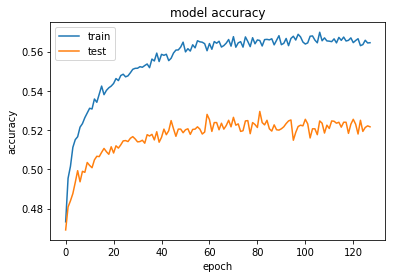

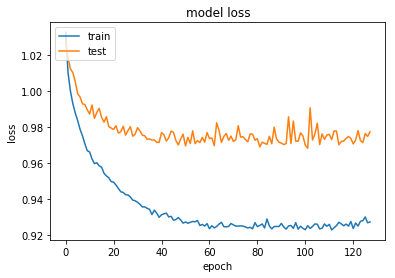

In [0]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#resnet , vgg-16

In [0]:
ls

In [0]:
cd images

/content/drive/My Drive/Colab Notebooks/PONG/images


In [0]:
!tree

.
├── frame_0.jpg
├── frame_10000.jpg
├── frame_10001.jpg
├── frame_10002.jpg
├── frame_10003.jpg
├── frame_10004.jpg
├── frame_10005.jpg
├── frame_10006.jpg
├── frame_10007.jpg
├── frame_10008.jpg
├── frame_10009.jpg
├── frame_1000.jpg
├── frame_10010.jpg
├── frame_10011.jpg
├── frame_10012.jpg
├── frame_10013.jpg
├── frame_10014.jpg
├── frame_10015.jpg
├── frame_10016.jpg
├── frame_10017.jpg
├── frame_10018.jpg
├── frame_10019.jpg
├── frame_1001.jpg
├── frame_10020.jpg
├── frame_10021.jpg
├── frame_10022.jpg
├── frame_10023.jpg
├── frame_10024.jpg
├── frame_10025.jpg
├── frame_10026.jpg
├── frame_10027.jpg
├── frame_10028.jpg
├── frame_10029.jpg
├── frame_1002.jpg
├── frame_10030.jpg
├── frame_10031.jpg
├── frame_10032.jpg
├── frame_10033.jpg
├── frame_10034.jpg
├── frame_10035.jpg
├── frame_10036.jpg
├── frame_10037.jpg
├── frame_10038.jpg
├── frame_10039.jpg
├── frame_1003.jpg
├── frame_10040.jpg
├── frame_10041.jpg
├── frame_10042.jpg
├── frame_10043.jpg
├── frame_10044.jpg
├── fr

In [0]:
#!apt-get install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 11 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 0s (104 kB/s)
Selecting previously unselected package tree.
(Reading database ... 130812 files and directories currently installed.)
Preparing to unpack .../tree_1.7.0-5_amd64.deb ...
Unpacking tree (1.7.0-5) ...
Setting up tree (1.7.0-5) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [0]:
cd ..

/content/drive/My Drive/Colab Notebooks/PONG


In [0]:
ls

 actions.csv                      images.zip
 colab_cnn_implementation.ipynb  'Pong_Thu May  2 10:48:32 2019.h5'
 images/


In [0]:
from google.colab import files
files.download('Pong_Thu May  2 10:48:32 2019.h5') 

In [0]:
MODEL_FIRST = 'Pong'
MODEL_END = time.asctime( time.localtime(time.time()))
MODEL_NAME = '{}_{}.h5'.format(MODEL_FIRST,MODEL_END)
#MODEL_NAME

# split into test and train set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.02, random_state=5)

# convert class vectors to binary class matricies for use in catagorical_crossentropy loss below
# number of action classifications
classifications = 3
y_train = keras.utils.to_categorical(y_train, classifications)
y_test = keras.utils.to_categorical(y_test, classifications)

#reference:-https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py
# CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

history = model.fit(x_train, y_train,
              batch_size=128,
              epochs=128,
              validation_data=(x_test, y_test),
              shuffle=True)
#save weights post training
print(MODEL_NAME)
model.save(MODEL_NAME)


Train on 29400 samples, validate on 600 samples
Epoch 1/128
29400/29400 [==============================] - 11s 380us/step - loss: 1.0352 - acc: 0.4697 - val_loss: 1.0486 - val_acc: 0.4750
Epoch 2/128
29400/29400 [==============================] - 9s 318us/step - loss: 1.0078 - acc: 0.4951 - val_loss: 1.0405 - val_acc: 0.4800
Epoch 3/128
29400/29400 [==============================] - 9s 320us/step - loss: 0.9932 - acc: 0.5110 - val_loss: 1.0337 - val_acc: 0.4917
Epoch 4/128
29400/29400 [==============================] - 9s 318us/step - loss: 0.9820 - acc: 0.5194 - val_loss: 1.0235 - val_acc: 0.4783
Epoch 5/128
29400/29400 [==============================] - 9s 315us/step - loss: 0.9739 - acc: 0.5266 - val_loss: 1.0209 - val_acc: 0.4883
Epoch 6/128
29400/29400 [==============================] - 9s 315us/step - loss: 0.9667 - acc: 0.5291 - val_loss: 1.0146 - val_acc: 0.4967
Epoch 7/128
29400/29400 [==============================] - 9s 314us/step - loss: 0.9599 - acc: 0.5322 - val_loss: 1.0

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


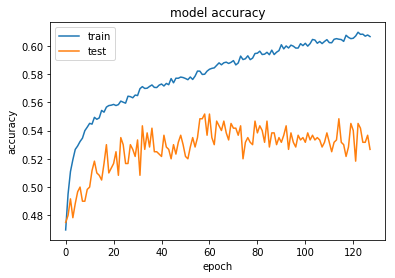

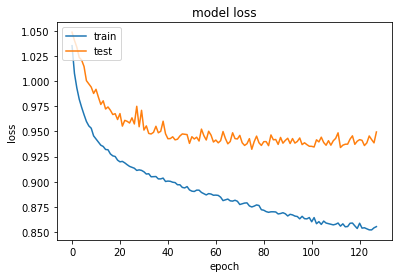

In [0]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#resnet , vgg-16

Train on 29400 samples, validate on 600 samples
Epoch 1/128
29400/29400 [==============================] - 12s 418us/step - loss: 1.0406 - acc: 0.4655 - val_loss: 1.0501 - val_acc: 0.4617
Epoch 2/128
29400/29400 [==============================] - 9s 321us/step - loss: 1.0122 - acc: 0.4884 - val_loss: 1.0423 - val_acc: 0.4750
Epoch 3/128
29400/29400 [==============================] - 9s 321us/step - loss: 0.9972 - acc: 0.5070 - val_loss: 1.0353 - val_acc: 0.4917
Epoch 4/128
29400/29400 [==============================] - 9s 321us/step - loss: 0.9869 - acc: 0.5107 - val_loss: 1.0271 - val_acc: 0.4933
Epoch 5/128
29400/29400 [==============================] - 9s 321us/step - loss: 0.9763 - acc: 0.5196 - val_loss: 1.0143 - val_acc: 0.5050
Epoch 6/128
29400/29400 [==============================] - 9s 321us/step - loss: 0.9690 - acc: 0.5253 - val_loss: 1.0115 - val_acc: 0.4950
Epoch 7/128
29400/29400 [==============================] - 9s 321us/step - loss: 0.9646 - acc: 0.5280 - val_loss: 0.9

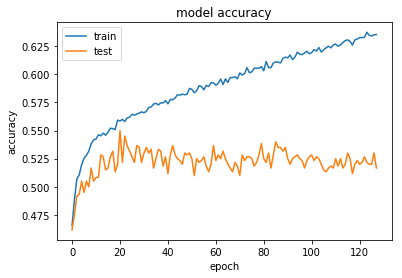

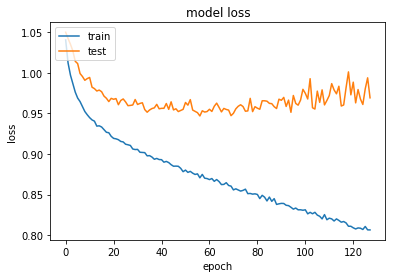

In [0]:
MODEL_FIRST = 'Pong'
MODEL_END = time.asctime( time.localtime(time.time()))
MODEL_NAME = '{}_{}.h5'.format(MODEL_FIRST,MODEL_END)
#MODEL_NAME

# split into test and train set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.02, random_state=5)

# convert class vectors to binary class matricies for use in catagorical_crossentropy loss below
# number of action classifications
classifications = 3
y_train = keras.utils.to_categorical(y_train, classifications)
y_test = keras.utils.to_categorical(y_test, classifications)

#reference:-https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py
# CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

history = model.fit(x_train, y_train,
              batch_size=256,
              epochs=128,
              validation_data=(x_test, y_test),
              shuffle=True)
#save weights post training

model.save(MODEL_NAME)

import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#resnet , vgg-16

Train on 29400 samples, validate on 600 samples
Epoch 1/128
29400/29400 [==============================] - 11s 389us/step - loss: 1.0476 - acc: 0.4583 - val_loss: 1.0550 - val_acc: 0.4567
Epoch 2/128
29400/29400 [==============================] - 8s 283us/step - loss: 1.0215 - acc: 0.4807 - val_loss: 1.0490 - val_acc: 0.4750
Epoch 3/128
29400/29400 [==============================] - 8s 281us/step - loss: 1.0082 - acc: 0.4910 - val_loss: 1.0427 - val_acc: 0.4683
Epoch 4/128
29400/29400 [==============================] - 8s 283us/step - loss: 0.9968 - acc: 0.5015 - val_loss: 1.0334 - val_acc: 0.4833
Epoch 5/128
29400/29400 [==============================] - 8s 282us/step - loss: 0.9881 - acc: 0.5143 - val_loss: 1.0216 - val_acc: 0.5033
Epoch 6/128
29400/29400 [==============================] - 8s 281us/step - loss: 0.9801 - acc: 0.5172 - val_loss: 1.0184 - val_acc: 0.5100
Epoch 7/128
29400/29400 [==============================] - 8s 281us/step - loss: 0.9732 - acc: 0.5247 - val_loss: 1.0

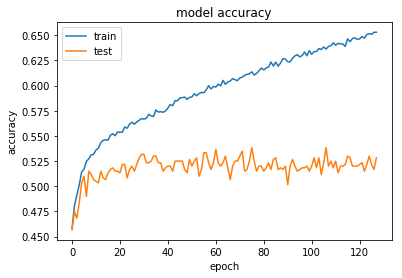

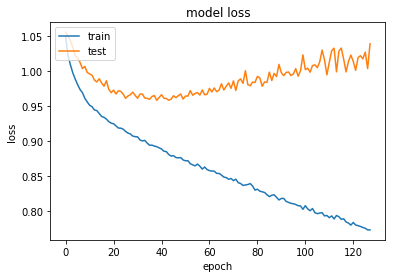

In [0]:
MODEL_FIRST = 'Pong'
MODEL_END = time.asctime( time.localtime(time.time()))
MODEL_NAME = '{}_{}.h5'.format(MODEL_FIRST,MODEL_END)
#MODEL_NAME

# split into test and train set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.02, random_state=5)

# convert class vectors to binary class matricies for use in catagorical_crossentropy loss below
# number of action classifications
classifications = 3
y_train = keras.utils.to_categorical(y_train, classifications)
y_test = keras.utils.to_categorical(y_test, classifications)

#reference:-https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py
# CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

history = model.fit(x_train, y_train,
              batch_size=512,
              epochs=128,
              validation_data=(x_test, y_test),
              shuffle=True)
#save weights post training

model.save(MODEL_NAME)

import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#resnet , vgg-16

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 29400 samples, validate on 600 samples
Epoch 1/512
29400/29400 [==============================] - 20s 667us/step - loss: 1.0656 - acc: 0.4481 - val_loss: 1.0578 - val_acc: 0.4483
Epoch 2/512
29400/29400 [==============================] - 8s 272us/step - loss: 1.0363 - acc: 0.4704 - val_loss: 1.0568 - val_acc: 0.4517
Epoch 3/512
29400/29400 [==============================] - 8s 272us/step - loss: 1.0268 - acc: 0.4753 - val_loss: 1.0533 - val_acc: 0.4733
Epoch 4/512
29400/29400 [==============================] - 8s 274us/step - loss: 1.0194 - acc: 0.4832 - val_loss: 1.0505 - val_acc: 0.4500
Epoch 5/512
29400/29400 [==============================] - 8s 276us/step - loss: 1.0130 - acc: 0.4861 - val_loss: 1.0459 - val_acc: 0.4750
Epoch 6/512
29400/294

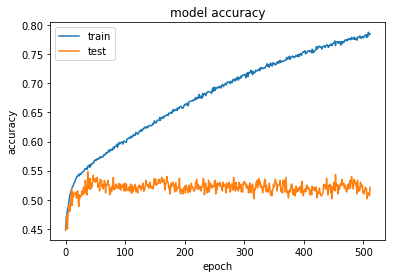

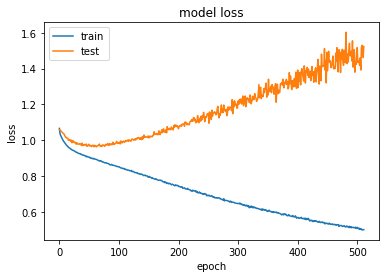

In [0]:
MODEL_FIRST = 'Pong'
MODEL_END = time.asctime( time.localtime(time.time()))
MODEL_NAME = '{}_{}.h5'.format(MODEL_FIRST,MODEL_END)
#MODEL_NAME

# split into test and train set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.02, random_state=5)

# convert class vectors to binary class matricies for use in catagorical_crossentropy loss below
# number of action classifications
classifications = 3
y_train = keras.utils.to_categorical(y_train, classifications)
y_test = keras.utils.to_categorical(y_test, classifications)

#reference:-https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py
# CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

history = model.fit(x_train, y_train,
              batch_size=2048,
              epochs=512,
              validation_data=(x_test, y_test),
              shuffle=True)
#save weights post training

model.save(MODEL_NAME)

import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#resnet , vgg-16

In [0]:
import copy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.datasets import mnist, cifar10
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten, Reshape
from keras.optimizers import SGD, RMSprop
from keras.utils import np_utils
from keras.regularizers import l2
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D, AveragePooling2D
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers import Convolution2D as Conv2D
from keras.layers.convolutional import Deconv2D as Conv2DTranspose
from PIL import Image




MODEL_FIRST = 'Pong'
MODEL_END = time.asctime( time.localtime(time.time()))
MODEL_NAME = '{}_{}.h5'.format(MODEL_FIRST,MODEL_END)
#MODEL_NAME

# split into test and train set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.02, random_state=5)

# convert class vectors to binary class matricies for use in catagorical_crossentropy loss below
# number of action classifications
classifications = 3
y_train = keras.utils.to_categorical(y_train, classifications)
y_test = keras.utils.to_categorical(y_test, classifications)

#reference:-https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py
# CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

history = model.fit(x_train, y_train,
              batch_size=2048,
              epochs=128,
              validation_data=(x_test, y_test),
              shuffle=True)
#save weights post training

model.save(MODEL_NAME)

import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#resnet , vgg-16


Train on 29400 samples, validate on 600 samples
Epoch 1/128
29400/29400 [==============================] - 9s 290us/step - loss: 1.0703 - acc: 0.4396 - val_loss: 1.0612 - val_acc: 0.4517
Epoch 2/128
29400/29400 [==============================] - 8s 271us/step - loss: 1.0365 - acc: 0.4684 - val_loss: 1.0571 - val_acc: 0.4450
Epoch 3/128
14336/29400 [=============>................] - ETA: 4s - loss: 1.0294 - acc: 0.4729

KeyboardInterrupt: ignored

In [0]:
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D

MODEL_FIRST = 'Pong_VGG-16'
MODEL_END = time.asctime( time.localtime(time.time()))
MODEL_NAME = '{}_{}.h5'.format(MODEL_FIRST,MODEL_END)
#MODEL_NAME

# split into test and train set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.02, random_state=5)

# convert class vectors to binary class matricies for use in catagorical_crossentropy loss below
# number of action classifications
classifications = 3
y_train = keras.utils.to_categorical(y_train, classifications)
y_test = keras.utils.to_categorical(y_test, classifications)

#reference:-https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py
# CNN model

###########################
"""
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
"""
##################

model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=x_train.shape[1:]))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))


# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

history = model.fit(x_train, y_train,
              batch_size=32,
              epochs=30,
              validation_data=(x_test, y_test),
              shuffle=True)
#save weights post training

model.save(MODEL_NAME)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:62: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:64: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:68: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:70: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:76: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
/usr/local/l

Train on 29400 samples, validate on 600 samples
Epoch 1/30
29400/29400 [==============================] - 78s 3ms/step - loss: 1.0631 - acc: 0.4341 - val_loss: 1.0551 - val_acc: 0.4633
Epoch 2/30
29400/29400 [==============================] - 76s 3ms/step - loss: 1.0115 - acc: 0.4897 - val_loss: 1.0375 - val_acc: 0.4717
Epoch 3/30
29400/29400 [==============================] - 76s 3ms/step - loss: 0.9848 - acc: 0.5094 - val_loss: 0.9781 - val_acc: 0.5100
Epoch 4/30
29400/29400 [==============================] - 76s 3ms/step - loss: 0.9692 - acc: 0.5205 - val_loss: 1.0166 - val_acc: 0.4917
Epoch 5/30
29400/29400 [==============================] - 76s 3ms/step - loss: 0.9596 - acc: 0.5264 - val_loss: 0.9966 - val_acc: 0.4883
Epoch 6/30
29400/29400 [==============================] - 75s 3ms/step - loss: 0.9557 - acc: 0.5316 - val_loss: 0.9776 - val_acc: 0.5067
Epoch 7/30
29400/29400 [==============================] - 75s 3ms/step - loss: 0.9510 - acc: 0.5329 - val_loss: 0.9588 - val_acc: 

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


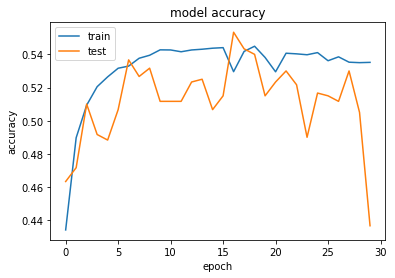

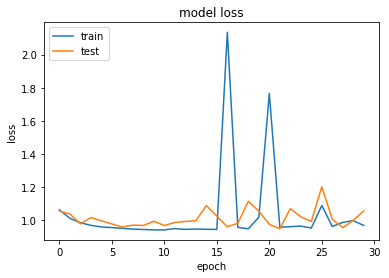

In [0]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#resnet , vgg-16

In [0]:
!pip install keras --upgrade

Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.2.4)


In [0]:
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D

In [0]:
MODEL_FIRST = 'Pong_VGG-16'
MODEL_END = time.asctime( time.localtime(time.time()))
MODEL_NAME = '{}_{}.h5'.format(MODEL_FIRST,MODEL_END)
#MODEL_NAME

# split into test and train set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.02, random_state=5)

# convert class vectors to binary class matricies for use in catagorical_crossentropy loss below
# number of action classifications
classifications = 3
y_train = keras.utils.to_categorical(y_train, classifications)
y_test = keras.utils.to_categorical(y_test, classifications)

#reference:-https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py
# CNN model

###########################
"""
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
"""
##################

model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=x_train.shape[1:]))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))


# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

history = model.fit(x_train, y_train,
              batch_size=512,
              epochs=1024,
              validation_data=(x_test, y_test),
              shuffle=True)
#save weights post training

model.save(MODEL_NAME)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:62: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:66: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:68: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:72: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
/usr/local/l

Train on 29400 samples, validate on 600 samples
Epoch 1/1024
29400/29400 [==============================] - 66s 2ms/step - loss: 1.0719 - acc: 0.4253 - val_loss: 1.0590 - val_acc: 0.4617
Epoch 2/1024
29400/29400 [==============================] - 44s 2ms/step - loss: 1.0460 - acc: 0.4687 - val_loss: 1.0786 - val_acc: 0.4483
Epoch 3/1024
29400/29400 [==============================] - 45s 2ms/step - loss: 1.0371 - acc: 0.4753 - val_loss: 1.0579 - val_acc: 0.4383
Epoch 4/1024
29400/29400 [==============================] - 45s 2ms/step - loss: 1.0237 - acc: 0.4849 - val_loss: 1.0568 - val_acc: 0.4467
Epoch 5/1024
29400/29400 [==============================] - 45s 2ms/step - loss: 1.0094 - acc: 0.4976 - val_loss: 1.0215 - val_acc: 0.4967
Epoch 6/1024
29400/29400 [==============================] - 45s 2ms/step - loss: 0.9922 - acc: 0.5087 - val_loss: 1.0193 - val_acc: 0.4767
Epoch 7/1024
29400/29400 [==============================] - 45s 2ms/step - loss: 0.9757 - acc: 0.5179 - val_loss: 1.04

In [0]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#resnet , vgg-16